In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('Project_Data.csv')
print("Dataset shape:", df.shape)
print(f"Churn Rate: {df['Churn Value'].mean():.2%}")

Dataset shape: (7043, 31)
Churn Rate: 26.54%


In [2]:
## Read the dataframe
df = pd.read_csv('Project_Data.csv')

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [4]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,NaN


In [5]:
null_df = df.isnull() # truth table. isna/isnull same 
null_df.sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [6]:
df.shape

(7043, 31)

In [7]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [8]:
df.describe()


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

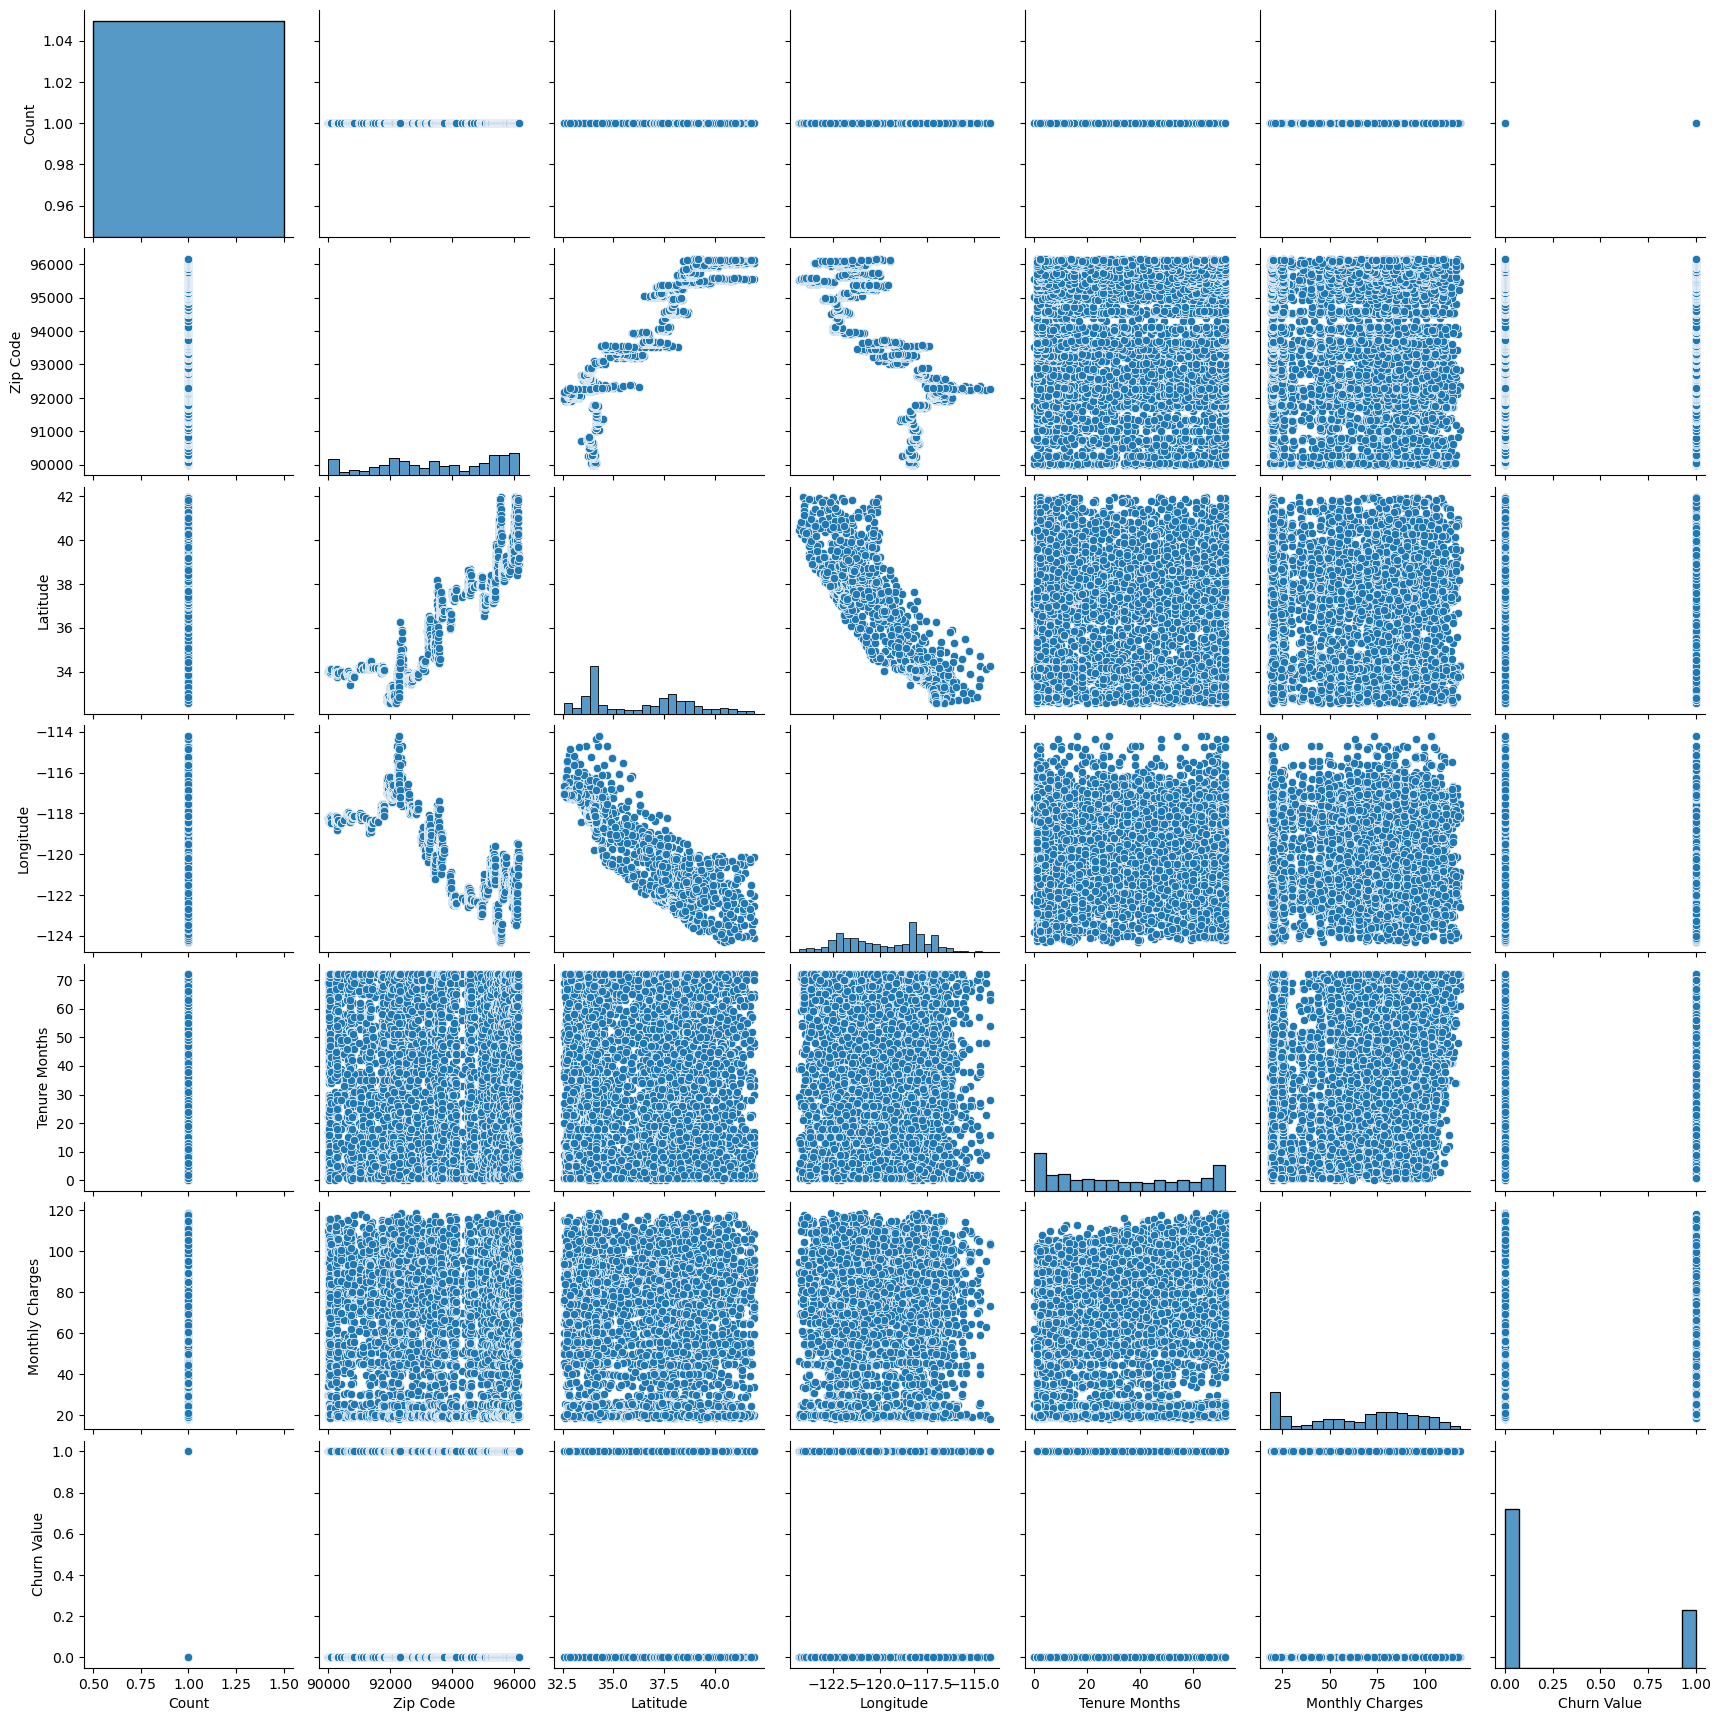

In [10]:
## Visualise the relationship between all numerical features 
sns.pairplot(data= df)

<Axes: >

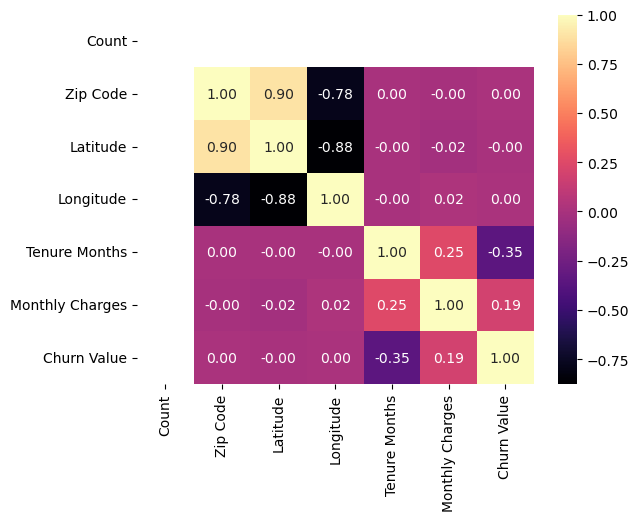

In [11]:
# Create a correlation heatmap of numerical features in the dataframe
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap = 'magma', fmt = '.2f')

In [15]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [16]:
df['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

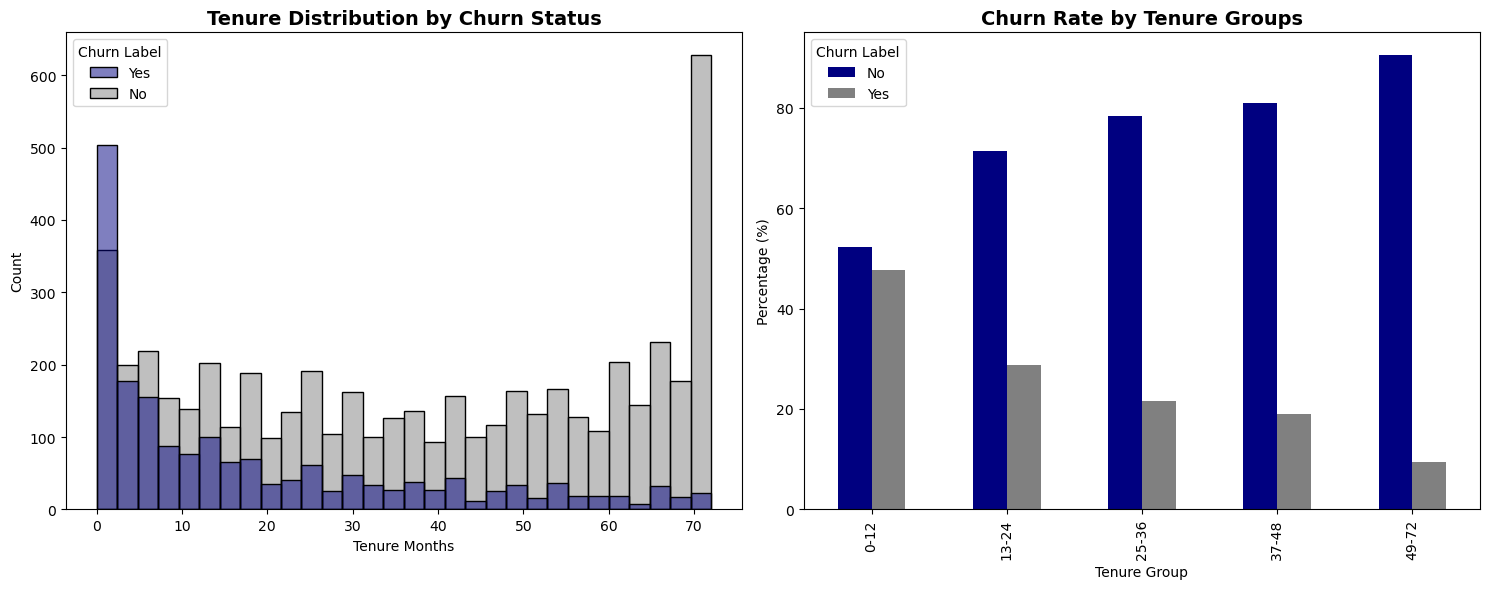

In [28]:
# Tenure Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Tenure distribution by Churn
sns.histplot(data=df, x='Tenure Months', hue='Churn Label', bins=30, ax=axes[0], palette=['navy', 'grey'])
axes[0].set_title('Tenure Distribution by Churn Status', fontsize=14, fontweight='bold')

# Churn rate by tenure groups
df['Tenure Group'] = pd.cut(df['Tenure Months'], bins=[0, 12, 24, 36, 48, 72, 100], 
                           labels=['0-12', '13-24', '25-36', '37-48', '49-72', '73+'])
tenure_churn = pd.crosstab(df['Tenure Group'], df['Churn Label'], normalize='index') * 100
tenure_churn.plot(kind='bar', ax=axes[1], color=['navy', 'grey'])
axes[1].set_title('Churn Rate by Tenure Groups', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Percentage (%)')

plt.tight_layout()
plt.show()

/var/folders/x5/h9wkzpbj1tqflmq6gk00r4l80000gn/T/ipykernel_85940/955526138.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_reasons.values, y=churn_reasons.index, palette='Blues')


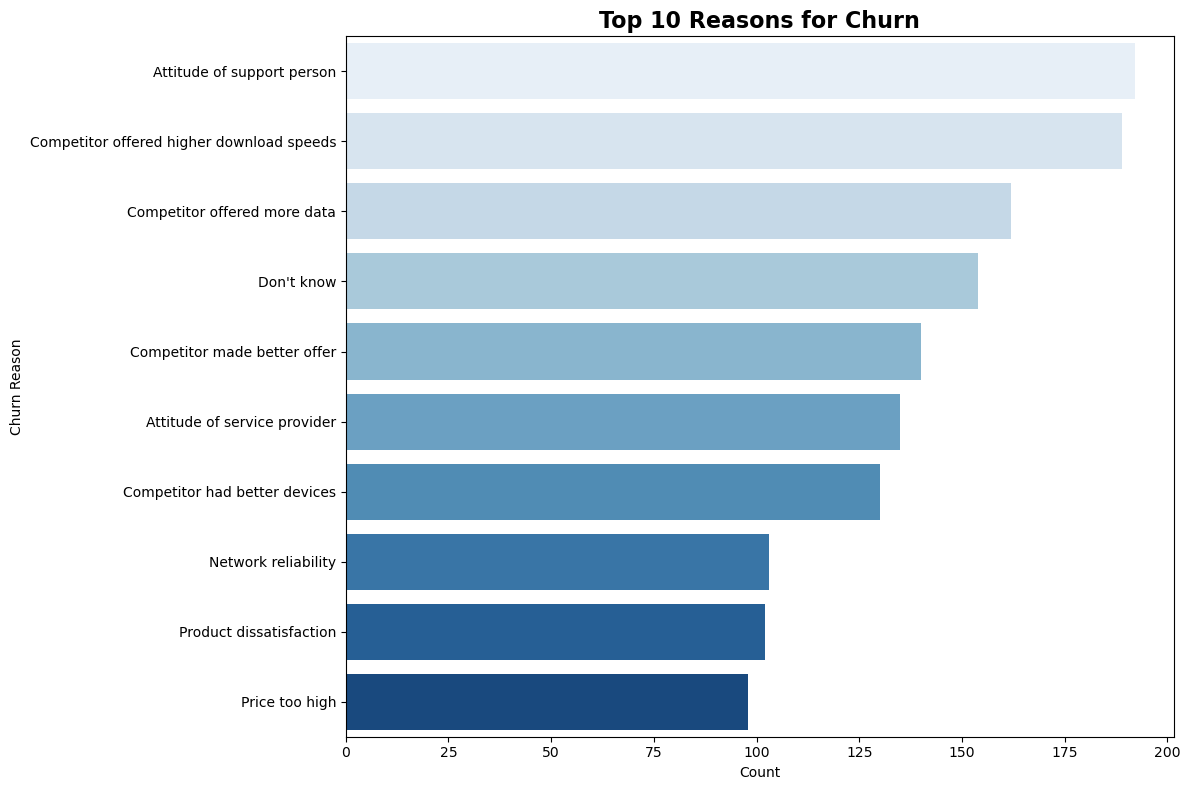

In [31]:
# Top Churn Reasons
plt.figure(figsize=(12, 8))
churn_reasons = df['Churn Reason'].value_counts().head(10)
sns.barplot(x=churn_reasons.values, y=churn_reasons.index, palette='Blues')
plt.title('Top 10 Reasons for Churn', fontsize=16, fontweight='bold')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

### Feature engineering

In [22]:
def feature_engineering(df):
    df_local = df.copy()
    columns = list(df_local.columns)
    df_local['Gender'] = df_local['Gender'].map({'Male': 0, 'Female': 1})
    fe_list = ['Senior Citizen',
               'Partner', 'Dependents',
               'Phone Service',
               'Paperless Billing',
              ]
    internet_list = [
                    'Online Security',
                    'Online Backup',
                    'Device Protection',
                    'Tech Support',
                    'Streaming TV',
                    'Streaming Movies'
                    ]
    for feature in fe_list:
        df_local[feature] = df_local[feature].map({'No': 0, 'Yes': 1})
    for feature in internet_list:
        pd.get_dummies(data = df_local,
                             columns = internet_list,
                             drop_first = True,
                             dtype = 'int')
    df_local['Multiple Lines'] = df_local['Multiple Lines'].map({'No': 0, 'Yes': 1, 'No phone service': 0})
    return df_local

In [25]:
df_local

NameError: name 'df_local' is not defined

In [45]:
# DATA PREPROCESSING

# Select features for modeling
features = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
    'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
    'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
    'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
    'Monthly Charges', 'Total Charges'
]

# Create feature dataframe
X = df[features].copy()
y = df['Churn Value']

# Handle categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Handle missing values in Total Charges
X['Total Charges'] = pd.to_numeric(X['Total Charges'], errors='coerce')
X['Total Charges'].fillna(X['Total Charges'].median(), inplace=True)

X.shape
y.value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [42]:
# SPLIT DATA AND SCALE FOR LOGISTIC REGRESSION

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape
X_test.shape

(1409, 19)

In [43]:
# TRAIN BOTH MODELS


# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression(
    random_state=42,
    class_weight='balanced',
    max_iter=1000,
    C=1.0
)

lr_model.fit(X_train_scaled, y_train)

print("Both models trained successfully!")

Both models trained successfully!


In [44]:
# MODEL PREDICTIONS AND PROBABILITIES

# Random Forest predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Logistic Regression predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

In [51]:
# MAKE PREDICTIONS

y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

In [50]:
## We'll use our trusty confusion matrix to answer the question above. 
#Let's first have a look at it on its own
print(metrics.confusion_matrix(y, lr_model['y_pred']))

NameError: name 'metrics' is not defined

In [ ]:
## There are 4 main metrics we're interested in at this stage: 
#accuracy, precision, recall and F1.
## The 'metrics' module from sklearn covers all of them (and more!) 
#So we can use a function like the one below

def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [ ]:
## Now, we simply apply the function on our predictions
get_results(y, df_model['y_pred'])

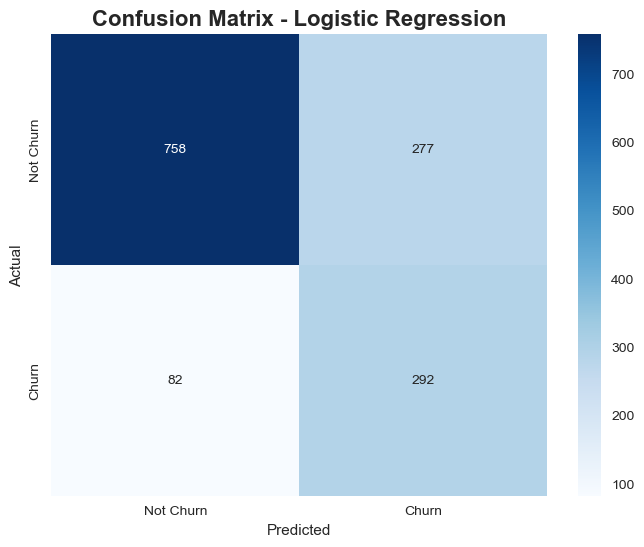

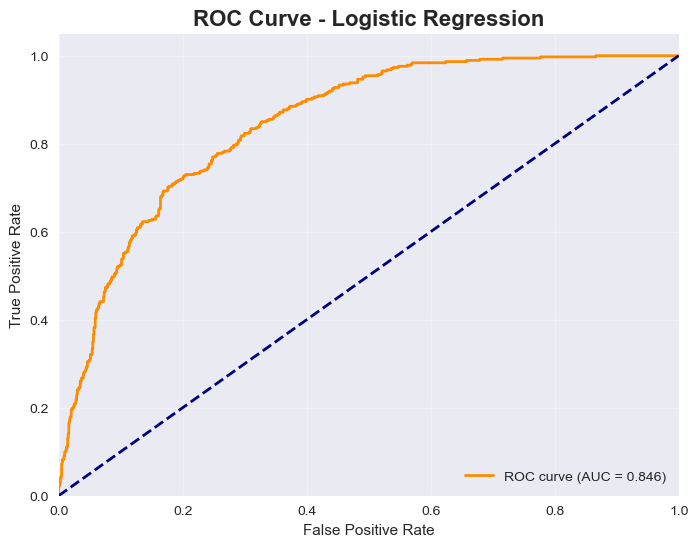

ROC AUC Score: 0.846


In [52]:
# MODEL EVALUATION

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Not Churn', 'Churn'], 
           yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Logistic Regression', fontsize=16, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"ROC AUC Score: {roc_auc:.3f}")